In [1]:
import pandas as pd

# create a pandas SEries
series_a = pd.Series([0.25, 0.5, 0.75, 1.0])
series_a

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [2]:
series_a.index

RangeIndex(start=0, stop=4, step=1)

In [3]:
series_a.values

array([0.25, 0.5 , 0.75, 1.  ])

# Generating a pandas Series
A series object can be generated from most python collections, and thus supports all common types in the data.

In [4]:
# a lsit
list_a = ['one', 'two', 'three']

series_b = pd.Series(list_a)
series_b

0      one
1      two
2    three
dtype: object

In [5]:
# a list with indices

list_a = ['one', 'two', 'three']
list_b = ['index_one', 'index_two', 'index_three']

series_c = pd.Series(data=list_a, index=list_b)
series_c

index_one        one
index_two        two
index_three    three
dtype: object

In [6]:
#creating a Series with same value

pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [7]:
fruits = pd.Series([1, 0, 2, 2], index=['apples', 'oranges', 'bananas', 'lemons'])
more_fruits = pd.Series([1, 0, 1, 5], index=['lemons', 'oranges', 'apples', 'bananas'])

In [8]:
fruits

apples     1
oranges    0
bananas    2
lemons     2
dtype: int64

In [9]:
more_fruits

lemons     1
oranges    0
apples     1
bananas    5
dtype: int64

In [10]:
fruits + more_fruits

apples     2
bananas    7
lemons     3
oranges    0
dtype: int64

# More Examples

In [11]:
berlin_year_to_population = {
    '1917' : 1681916,
    '1919' : 2098980,
    '1921' : 3454252,
    '1923' : 1324252,
    '1925' : 2728722,
    '1927' : 4325231,
    '1929' : 3425212,
    '1931' : 2325131,
    '1933' : 2526212,
    '1935' : 5262421,
    '1937' : 3234142,
    '1939' : 4678384,
    '1941' : 6754362,
    '1943' : 6987899
}

population = pd.Series(berlin_year_to_population)

In [12]:
# show me first 5 rows
# can also call head() with a parameter specifying the number of rows

population.head()

1917    1681916
1919    2098980
1921    3454252
1923    1324252
1925    2728722
dtype: int64

Text(0.5, 0, 'Year')

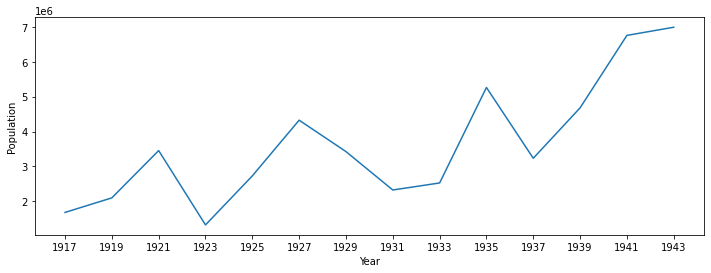

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = [12,4])
plt.plot(population)
plt.ylabel("Population")
plt.xlabel("Year")

# Indexing a pandas Series

In [14]:
population.name = 'Population'
population.index.name = 'Year'
# note that the indices are strings

population

Year
1917    1681916
1919    2098980
1921    3454252
1923    1324252
1925    2728722
1927    4325231
1929    3425212
1931    2325131
1933    2526212
1935    5262421
1937    3234142
1939    4678384
1941    6754362
1943    6987899
Name: Population, dtype: int64

In [15]:
population['1937']

3234142

In [16]:
population[['1919', '1925', '1931', '1941']]

Year
1919    2098980
1925    2728722
1931    2325131
1941    6754362
Name: Population, dtype: int64

In [17]:
population['1921' :'1935']

Year
1921    3454252
1923    1324252
1925    2728722
1927    4325231
1929    3425212
1931    2325131
1933    2526212
1935    5262421
Name: Population, dtype: int64

In [18]:
population > 4e6

Year
1917    False
1919    False
1921    False
1923    False
1925    False
1927     True
1929    False
1931    False
1933    False
1935     True
1937    False
1939     True
1941     True
1943     True
Name: Population, dtype: bool

In [19]:
# filter Series by condition

population[population > 4e6]

Year
1927    4325231
1935    5262421
1939    4678384
1941    6754362
1943    6987899
Name: Population, dtype: int64

In [20]:
population_ = population.copy()    # Series mutable; without using .copy() you change the original object
population_[population_ > 4e6] = "more than four million"
population_

Year
1917                   1681916
1919                   2098980
1921                   3454252
1923                   1324252
1925                   2728722
1927    more than four million
1929                   3425212
1931                   2325131
1933                   2526212
1935    more than four million
1937                   3234142
1939    more than four million
1941    more than four million
1943    more than four million
Name: Population, dtype: object

In [21]:
population[population == 3454252]

Year
1921    3454252
Name: Population, dtype: int64

In [22]:
# more complex condtions

population[(population== 3454252) | (population== 1681916)]

Year
1917    1681916
1921    3454252
Name: Population, dtype: int64

# Dictionary-like access

In [23]:
data = pd.Series([0.5, 1, 1.5, 2], index=['a', 'b', 'c', 'd'])
data

a    0.5
b    1.0
c    1.5
d    2.0
dtype: float64

In [24]:
data['b']

1.0

In [25]:
'a' in data

True

In [26]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [27]:
list(data.items())

[('a', 0.5), ('b', 1.0), ('c', 1.5), ('d', 2.0)]

In [28]:
data['e'] = 1.25
data

a    0.50
b    1.00
c    1.50
d    2.00
e    1.25
dtype: float64

# Array-like access

In [29]:
# slicing by explicit index
data ['a':'c']

a    0.5
b    1.0
c    1.5
dtype: float64

In [30]:
# slicing by implicit integer index
data[0 : 2]

a    0.5
b    1.0
dtype: float64

In [31]:
# fancy indexing
data[['a', 'e']]

a    0.50
e    1.25
dtype: float64

# Explicit and Positional Indexing

In [32]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [33]:
data[1]

'a'

In [34]:
# explicit index for more rows
data[[1,3]]

1    a
3    b
dtype: object

In [35]:
# positional index for slicing
data[1:3]


3    b
5    c
dtype: object

In [36]:
# postional index when actual index is not integer values
data[1]

'a'

# Expilict Indexing with loc

In [37]:
data

1    a
3    b
5    c
dtype: object

In [38]:
data.loc[1]


'a'

In [39]:
# loc for explicit indexing
data.loc[1:3]

1    a
3    b
dtype: object

# Postional Indexing with iloc

In [40]:
data.iloc[1]

'b'

In [41]:
data.iloc[1:3]

3    b
5    c
dtype: object

# Methods for pandas Series

In [42]:
population_in_millions = population / 1e6
population_in_millions

Year
1917    1.681916
1919    2.098980
1921    3.454252
1923    1.324252
1925    2.728722
1927    4.325231
1929    3.425212
1931    2.325131
1933    2.526212
1935    5.262421
1937    3.234142
1939    4.678384
1941    6.754362
1943    6.987899
Name: Population, dtype: float64

In [43]:
# histograms: which value occurs how often
population_in_millions.value_counts()

1.681916    1
3.454252    1
1.324252    1
4.678384    1
6.987899    1
3.234142    1
2.325131    1
2.098980    1
2.526212    1
3.425212    1
6.754362    1
4.325231    1
5.262421    1
2.728722    1
Name: Population, dtype: int64

In [44]:
#  sorting
population.sort_values()

Year
1923    1324252
1917    1681916
1919    2098980
1931    2325131
1933    2526212
1925    2728722
1937    3234142
1929    3425212
1921    3454252
1927    4325231
1939    4678384
1935    5262421
1941    6754362
1943    6987899
Name: Population, dtype: int64

In [45]:
# for sorting inplace do below
 # population.sort_values(inplace_True)

In [46]:
# the good old len still available
len(population)

14

In [47]:
# basic stats
population.describe()

count    1.400000e+01
mean     3.629080e+06
std      1.769458e+06
min      1.324252e+06
25%      2.375401e+06
50%      3.329677e+06
75%      4.590096e+06
max      6.987899e+06
Name: Population, dtype: float64

# applying arbitrary functions

In [48]:
def int_divide_by_million(v):
    """ Divides number by a million and returns its integer represntation"""
    return int(v / 1e6)
int_divide_by_million(35 * 1e6)

35

In [49]:
population.map(int_divide_by_million) 
# map will apply the function(int_divide_by_million) to data frame population on each row

Year
1917    1
1919    2
1921    3
1923    1
1925    2
1927    4
1929    3
1931    2
1933    2
1935    5
1937    3
1939    4
1941    6
1943    6
Name: Population, dtype: int64

# Pandas DataFrame

think ofa relational table

# Generating pandas DataFrame

In [50]:
import numpy as np

In [51]:
some_numpy_array = np.arange(9).reshape((3,3))
some_numpy_array

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [52]:
df = pd.DataFrame(some_numpy_array, 
                  index=['a', 'b', 'c'],
                  columns=['Ohio', 'Texas', 'California'])
df

,Ohio,Texas,California
a,0,1,2
b,3,4,5
c,6,7,8


# Constructors



# DataFrame from a csv file

In [53]:
berlin_population = pd.read_csv("csvData.csv")

In [54]:
berlin_population.head()

,Year,Population,GrowthRate,Growth
0,2035,3638756,0.0019,6784
1,2034,3631972,0.0018,6649
2,2033,3625323,0.0018,6507
3,2032,3618816,0.0018,6355
4,2031,3612461,0.0017,6193


In [55]:
# like Series (and  tables in DBs) DataFrames haves indices
df = pd.DataFrame(berlin_population)
df.index

RangeIndex(start=0, stop=86, step=1)

In [56]:
# Accessing by row and column index
df.loc[2, 'Population']

3625323

In [57]:
# Accesing by entire column
df.loc[:, 'Year']

0     2035
1     2034
2     2033
3     2032
4     2031
      ... 
81    1954
82    1953
83    1952
84    1951
85    1950
Name: Year, Length: 86, dtype: int64

In [58]:
# Accesing by entire column
df['Year']

0     2035
1     2034
2     2033
3     2032
4     2031
      ... 
81    1954
82    1953
83    1952
84    1951
85    1950
Name: Year, Length: 86, dtype: int64

In [59]:
# a single column of a DataFrame is a Series
df['Population']

0     3638756
1     3631972
2     3625323
3     3618816
4     3612461
       ...   
81    3306290
82    3314095
83    3321908
84    3329761
85    3337621
Name: Population, Length: 86, dtype: int64

In [60]:
# boolean indexing
df['Population'] < 3e6

0     False
1     False
2     False
3     False
4     False
      ...  
81    False
82    False
83    False
84    False
85    False
Name: Population, Length: 86, dtype: bool

# Database style Joins

In [61]:
df1 = pd.DataFrame({ 'key' : ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1' : range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [62]:
df2 = pd.DataFrame({ 'key' : ['a', 'b', 'd'], 'data2' : range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


# Inner join

In [63]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


# Outer Join

In [64]:
pd.merge(df1, df2, on='key', how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


# Concatenation

In [66]:
s1 = pd.Series([0, 1], index = ['a', 'b'])
s1

a    0
b    1
dtype: int64

In [67]:
s2 = pd.Series([2, 3, 4], index = ['c', 'd', 'e'])
s2

c    2
d    3
e    4
dtype: int64

In [68]:
s3 = pd.Series([5, 6], index = ['f', 'g'])
pd.concat([s1, s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [69]:
pd.concat([s1,s2,s3], axis =1, sort = True)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


# Exploration of baby names in Berlin

In [71]:
# check the URL syntax
df = pd.read_csv("https://raw.githubusercontent.com/berlinonline/haeufige-vornamen-berlin/master/data/cleaned/2020/charlottenburg-wilmersdorf.csv", sep=',', error_bad_lines =False)

In [72]:
df.head()

,vorname,anzahl,geschlecht,position
0,Marie,68,w,2
1,Sophie,51,w,2
2,Charlotte,45,w,1
3,Alexander,36,m,2
4,Noah,35,m,1


In [73]:
import urllib
import os

districts = [
    "charlottenburg-wilmersdorf",
    "friedrichshain-kreuzberg",
    "lichtenberg",
    "marzahn-hellersdorf",
    "mitte",
    "neukoelln",
    "pankow",
    "reinickendorf",
    "spandau",
    "steglitz-zehlendorf",
    "tempelhof-schoeneberg",
    "treptow_koepenick"
]

years = range (2013,2021)

In [78]:
# download all name files from berlin open data protal

all_names =[]

for d in districts:
     for y in years:
             try:
                    url = f"https://raw.githubusercontent.com/berlinonline/haeufige-vornamen-berlin/master/data/cleaned/{y}/{d}.csv"
                    df_names_districts = pd.read_csv(url, sep=',', error_bad_lines = False)
                    df_names_districts['district'] = d
                    df_names_districts['year'] = y
                    all_names.append(df_name_districts)
            except :
                print(f"File {url} not found")

# concatenate DataFrame
all_names_df = pd.concat(all_names, sort=True)

# dump to file
all_names_df.to_csv(os.path.join("jasdata_science", "all_names_berlin.csv"), index=False)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)